In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow

pd.options.mode.chained_assignment = None

# Import Data

In [25]:
# Import Data# Import the data
df = pd.read_csv("../crowding_data.csv", low_memory=False)


In [26]:
# View column names and drop unnecesary columns for the model 
df.columns


Index(['id', 'expid', 'membid', 'myear', 'sex', 'calcage', 'citizen', 'status',
       'msolo', 'msuccess', 'msmtdate1', 'msmtdate2', 'msmtdate3', 'route1',
       'route2', 'route3', 'route4', 'mo2used', 'mo2none', 'mo2climb',
       'mo2descent', 'mo2sleep', 'death', 'deathdate', 'msmtbid', 'stdrte',
       'new_route', 'new_status', 'climber_count'],
      dtype='object')

# Feature Selection

In [27]:
# Set features
feature_names = ['sex', 'calcage', 'citizen', 'new_route', 'mo2used', 'mo2climb',
                 'mo2descent', 'mo2sleep', 'stdrte', 'new_status', 'climber_count']

X = df[feature_names]

In [28]:
# Convert X values to numerical 

###                KEY                  ### 
###        Male = 0, Female = 1         ###
###        True = 1, False = 0          ###
###  Citizen and Route = see label map  ###

X.replace(True, 1, inplace=True)
X['sex'] = pd.get_dummies(X['sex'])

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()

# Perform label transformation and create label maps for later use 
X['citizen'] = le.fit_transform(X['citizen'])
country_label_map = dict(zip(le.classes_, le.transform(le.classes_)))
X['new_route'] = le.fit_transform(X['new_route'])
route_label_map = dict(zip(le.classes_, le.transform(le.classes_)))
X['new_status'] = le.fit_transform(X['new_route'])
status_label_map = dict(zip(le.classes_, le.transform(le.classes_)))

X

,sex,calcage,citizen,new_route,mo2used,mo2climb,mo2descent,mo2sleep,stdrte,new_status,climber_count
0,0,32,15,2,1.0,1.0,0.0,1.0,1.0,2,3.0
1,0,40,82,2,0.0,0.0,0.0,0.0,1.0,2,3.0
2,0,29,82,2,1.0,1.0,0.0,1.0,1.0,2,3.0
3,0,37,82,1,0.0,0.0,0.0,0.0,0.0,1,3.0
4,0,33,82,1,0.0,0.0,0.0,0.0,0.0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...
15003,1,16,27,0,1.0,1.0,0.0,1.0,1.0,0,15.0
15004,0,37,27,0,1.0,1.0,0.0,1.0,1.0,0,15.0
15005,0,57,27,0,1.0,1.0,0.0,1.0,1.0,0,15.0
15006,0,35,27,0,1.0,1.0,0.0,1.0,1.0,0,15.0


# Target Selection

In [29]:
target_names = df['death'].unique()
target_names


array([False,  True])

In [30]:
y  = df['death']

# Create a Train Test Split


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [32]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Create the scaler
X_scaler = MinMaxScaler().fit(X_train)

# Transform the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [33]:
# Convert the y values to numerical using label_encoder/to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)
y_test_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

# Train the Model



In [34]:
# Create and initial trial model and add layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

inputs = X_train.shape[1]

model = Sequential()
model.add(Dense(units=60, activation='relu', input_dim=inputs))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))


In [35]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                720       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               12200     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 402       
Total params: 13,322
Trainable params: 13,322
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2,
    )

Epoch 1/100
352/352 - 1s - loss: 0.0902 - accuracy: 0.9835
Epoch 2/100
352/352 - 0s - loss: 0.0661 - accuracy: 0.9870
Epoch 3/100
352/352 - 0s - loss: 0.0655 - accuracy: 0.9870
Epoch 4/100
352/352 - 0s - loss: 0.0647 - accuracy: 0.9870
Epoch 5/100
352/352 - 0s - loss: 0.0646 - accuracy: 0.9870
Epoch 6/100
352/352 - 0s - loss: 0.0643 - accuracy: 0.9870
Epoch 7/100
352/352 - 0s - loss: 0.0638 - accuracy: 0.9870
Epoch 8/100
352/352 - 0s - loss: 0.0635 - accuracy: 0.9870
Epoch 9/100
352/352 - 0s - loss: 0.0632 - accuracy: 0.9870
Epoch 10/100
352/352 - 0s - loss: 0.0632 - accuracy: 0.9870
Epoch 11/100
352/352 - 0s - loss: 0.0634 - accuracy: 0.9870
Epoch 12/100
352/352 - 0s - loss: 0.0631 - accuracy: 0.9870
Epoch 13/100
352/352 - 0s - loss: 0.0630 - accuracy: 0.9870
Epoch 14/100
352/352 - 0s - loss: 0.0626 - accuracy: 0.9870
Epoch 15/100
352/352 - 0s - loss: 0.0626 - accuracy: 0.9870
Epoch 16/100
352/352 - 0s - loss: 0.0624 - accuracy: 0.9870
Epoch 17/100
352/352 - 0s - loss: 0.0629 - accura

# Quantify Model


In [40]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Neural Network Performace - Loss: {model_loss}, Accuracy: {model_accuracy}")

118/118 - 0s - loss: 0.0907 - accuracy: 0.9843
Neural Network Performace - Loss: 0.09071195870637894, Accuracy: 0.9842750430107117


In [41]:
x = X_train_scaled[50].tolist()
result = model.predict([x])
print(f"Risk of death for data point 50 is {round(result[0][1]*100,2)}%")

Risk of death for data point 50 is 0.35%


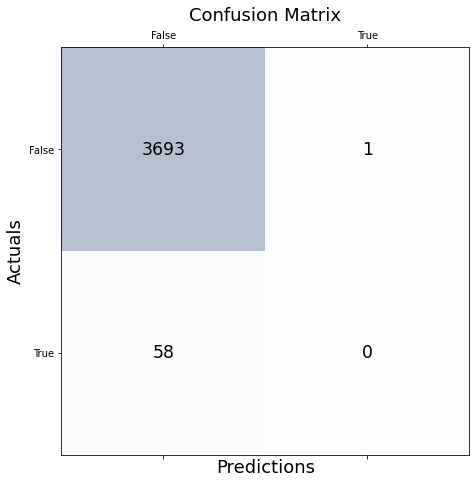

In [42]:
# Create a confusion matrix to visualise the performance 
from sklearn.metrics import confusion_matrix

predictions = np.argmax(model.predict(X_test_scaled), axis=-1)

conf_matrix = confusion_matrix(y_true=encoded_y_test, y_pred=predictions)

fig, ax = plt.subplots(figsize=(7.5, 7.5))

ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predictions', fontsize=18)
ax.set_xticks([0,1])
ax.set_xticklabels(target_names)
plt.ylabel('Actuals', fontsize=18)
ax.set_yticks([0,1])
ax.set_yticklabels(target_names)

plt.show()

# Hyperperameter tuning

#### Talos Custom Hyperparameter Optimiser for Keras, Tensorflow used 
Availble from: <a href="https://github.com/autonomio/talos/">https://github.com/autonomio/talos/</a>
<img src="https://raw.githubusercontent.com/autonomio/talos/master/logo.png">

In [43]:
import talos

# Function to run the model 
def everest(x_train, y_train, x_val, y_val, params):
    model = Sequential()
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1], 
              activation=params['activation']))
 
    model.add(Dropout(params['dropout']))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=params['optimizer'], metrics=['accuracy'])
    
    out = model.fit(x_train, 
                    y_train,
                    validation_data=(x_val, y_val),
                    epochs=params['epochs'],
                    batch_size=params['batch_size'],
                    verbose=0)
    
    return out, model

In [44]:
# Create a parameter dictionary
p = {'first_neuron':[30,60,120,240],
    'hidden_layers':[1, 2],
    'batch_size': [10,20, 30],
    'epochs': [100, 150, 200],
    'dropout': [0],
    'optimizer': ['Nadam', 'Adam'],
    'losses': ['binary_crossentropy'],
    'activation':['relu'],
    'last_activation': ['sigmoid']}

In [45]:
t = talos.Scan(x=X_train_scaled, y=encoded_y_train, params=p, model=everest, experiment_name='everest_tune', round_limit=30)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [28:06<00:00, 56.20s/it]


In [46]:
t.details

experiment_name            everest_tune
random_method          uniform_mersenne
reduction_method                   None
reduction_interval                   50
reduction_window                     20
reduction_threshold                 0.2
reduction_metric                val_acc
complete_time            08/25/21/10:05
x_shape                     (11256, 11)
y_shape                        (11256,)
dtype: object

### Best parameters:  
  
There are a a number of models which reach an accuracy of 98.8451% with validation data set

Note that the underlying rate death rate in data is only 1.4% so it is relatively 'easy' to achieve high accuarcy with this model
  

In [47]:
# Display a dataframe comapring the results of the different combinations 
t.data

,start,end,duration,round_epochs,loss,accuracy,val_loss,val_accuracy,activation,batch_size,dropout,epochs,first_neuron,hidden_layers,last_activation,losses,optimizer
0,08/25/21-093655,08/25/21-093818,82.559456,150,0.058237,0.986673,0.060787,0.987267,relu,10,0,150,60,1,sigmoid,binary_crossentropy,Adam
1,08/25/21-093818,08/25/21-094033,135.116495,200,0.057235,0.986927,0.062950,0.986971,relu,10,0,200,60,2,sigmoid,binary_crossentropy,Nadam
2,08/25/21-094033,08/25/21-094159,85.866252,150,0.056830,0.986673,0.061799,0.986378,relu,10,0,150,240,2,sigmoid,binary_crossentropy,Nadam
3,08/25/21-094159,08/25/21-094304,64.973133,200,0.057016,0.986547,0.065341,0.987267,relu,20,0,200,120,2,sigmoid,binary_crossentropy,Adam
4,08/25/21-094305,08/25/21-094328,22.989416,100,0.059663,0.986547,0.059242,0.987563,relu,30,0,100,240,2,sigmoid,binary_crossentropy,Nadam
5,08/25/21-094328,08/25/21-094400,31.974996,150,0.062745,0.986420,0.057353,0.988747,relu,30,0,150,30,1,sigmoid,binary_crossentropy,Adam
6,08/25/21-094400,08/25/21-094432,32.031708,100,0.060651,0.986420,0.059389,0.988451,relu,20,0,100,120,1,sigmoid,binary_crossentropy,Adam
7,08/25/21-094432,08/25/21-094517,44.957690,200,0.059123,0.986547,0.059992,0.987563,relu,30,0,200,60,1,sigmoid,binary_crossentropy,Adam
8,08/25/21-094517,08/25/21-094558,41.377290,200,0.062547,0.986420,0.059163,0.988155,relu,30,0,200,30,1,sigmoid,binary_crossentropy,Adam
9,08/25/21-094559,08/25/21-094759,120.428813,200,0.055078,0.986673,0.070175,0.986082,relu,10,0,200,240,1,sigmoid,binary_crossentropy,Nadam


In [48]:
# Retrain the model with the optimised paramaters 

p_optimisied = {'first_neuron':60,
                'second_neuron':200,
                'hidden_layers':1,
                'batch_size': 30,
                'epochs': 150,
                'dropout': 0,
                'optimizer': 'Nadam',
                'activation':'relu',
               }

def everest_optimised(x_train, y_train, params):
    model = Sequential()
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1], 
              activation=params['activation']))
    
#     model.add(Dense(params['second_neuron'], activation=params['activation']))
 
    model.add(Dropout(params['dropout']))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=params['optimizer'], metrics=['accuracy'])
    
    out = model.fit(x_train, 
                    y_train,
                    epochs=params['epochs'],
                    batch_size=params['batch_size'],
                    verbose=0)

    return out, model

In [49]:
# Re-fit the training data to the model
out, model = everest_optimised(X_train_scaled, encoded_y_train, p_optimisied)

In [50]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, encoded_y_test, verbose=2)
print(f"Neural Network Performace - Loss: {model_loss}, Accuracy: {model_accuracy}")

118/118 - 0s - loss: 0.0777 - accuracy: 0.9845
Neural Network Performace - Loss: 0.07768700271844864, Accuracy: 0.9845415949821472


# Save the Model

In [51]:
# Save the model
filename = 'crowding_model_death.h5'
model.save(filename)

# Load the Model

In [ ]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("Model 2 - Deep_learning.h5")